In [1]:
! pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [3]:
tf.random.set_seed(100)

In [4]:
# suicide_master = pd.read_csv('/content/sample_data/suicide_master.csv')
suicide_master = pd.read_csv('/content/suicide_master.csv')

In [5]:
#Changing the type of the year variable from numeric to string

suicide_master['year'] = suicide_master['year'].astype(int)

suicide_master['year'] = suicide_master['year'].astype(str)

In [6]:
# Drop the column suicide_no as this column is used to predict suicide rates

sm_1 = suicide_master.drop(columns=['suicides_no'])

#Drop the suicide cluster column to see how this affects the model

sm_2 = sm_1.drop(columns=['suicide_cluster'])

In [7]:
# Re - identifying the numeric variables

# Identifyig the numeric variables

numeric_cols = suicide_master.select_dtypes(include = ['number']).columns.values.tolist()

# numeric.remove('Id')

numeric_cols

['suicides_no',
 'population',
 'suicidesper100k',
 'gdp_for_year',
 'gdp_per_capita',
 'Compensation of employees',
 'Unemployment(% of total labor force)',
 'Labor force strength',
 'Life expectancy',
 'suicide_cluster']

In [8]:
numeric_cols.remove('suicides_no')

numeric_cols.remove('suicidesper100k')

numeric_cols

['population',
 'gdp_for_year',
 'gdp_per_capita',
 'Compensation of employees',
 'Unemployment(% of total labor force)',
 'Labor force strength',
 'Life expectancy',
 'suicide_cluster']

In [9]:
numeric_cols_2 = numeric_cols

numeric_cols_2.remove('suicide_cluster')

numeric_cols_2

['population',
 'gdp_for_year',
 'gdp_per_capita',
 'Compensation of employees',
 'Unemployment(% of total labor force)',
 'Labor force strength',
 'Life expectancy']

In [10]:
# Re-identifying the  categoricl variables

cat_cols = suicide_master.select_dtypes(include = ['object']).columns.values.tolist()

cat_cols


['country', 'year', 'sex', 'age', 'generation']

In [11]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

sm_1[numeric_cols] = rb_scaler.fit_transform(sm_1[numeric_cols])

# sm_2[numeric_cols] = rb_scaler.fit_transform(sm_2[numeric_cols_2])

In [12]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()

for c in cat_cols :


 sm_1[c] = l_encoder.fit_transform(sm_1[c])

#  sm_2[c] = l_encoder.fit_transform(sm_2[c])

In [13]:
# sm_data.info()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(sm_1.drop(columns=['suicidesper100k']), sm_1['suicidesper100k'], test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape

((5829, 13), (2499, 13))

In [16]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [17]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
46/46 [==============================] - 4s 10ms/step - loss: 402.0342 - val_loss: 375.8768
Epoch 2/400
46/46 [==============================] - 0s 5ms/step - loss: 332.7887 - val_loss: 306.8179
Epoch 3/400
46/46 [==============================] - 0s 4ms/step - loss: 272.2702 - val_loss: 268.9921
Epoch 4/400
46/46 [==============================] - 0s 5ms/step - loss: 249.7949 - val_loss: 255.8049
Epoch 5/400
46/46 [==============================] - 0s 4ms/step - loss: 237.1664 - val_loss: 245.7571
Epoch 6/400
46/46 [==============================] - 0s 4ms/step - loss: 227.8042 - val_loss: 236.2511
Epoch 7/400
46/46 [==============================] - 0s 4ms/step - loss: 220.1564 - val_loss: 229.0691
Epoch 8/400
46/46 [==============================] - 0s 4ms/step - loss: 213.3271 - val_loss: 222.5897
Epoch 9/400
46/46 [==============================] - 0s 4ms/step - loss: 207.1909 - val_loss: 215.1723
Epoch 10/400
46/46 [==============================] - 0s 5ms/step - loss

In [18]:
losses = pd.DataFrame(model.history.history)

<Axes: >

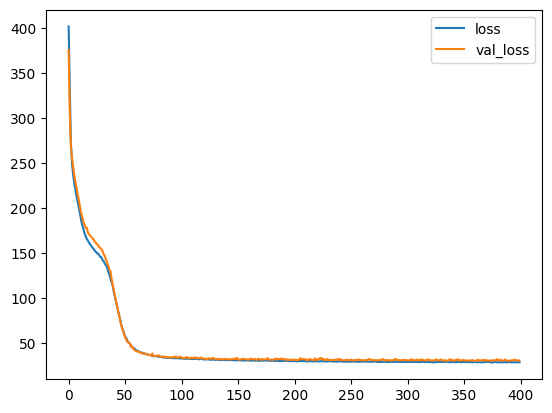

In [19]:
losses.plot()

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [21]:
predictions_train = model.predict(X_train)

183/183 [==============================] - 0s 2ms/step


In [22]:
predictions = model.predict(X_test)

predictions

79/79 [==============================] - 0s 2ms/step


array([[ 4.4647446],
       [ 2.274149 ],
       [ 4.546089 ],
       ...,
       [ 5.424777 ],
       [11.465623 ],
       [ 4.0257907]], dtype=float32)

In [23]:
y_test

5278     0.00
8084     3.60
6004     9.59
2589     1.96
5308    17.31
        ...  
7445     7.03
376     18.90
7987     4.10
228      9.23
5824    12.03
Name: suicidesper100k, Length: 2499, dtype: float64

In [24]:
print(r2_score(y_train,predictions_train))

print(r2_score(y_test,predictions))

0.8829961958453164
0.8799282841245235


In [25]:
print(mean_absolute_error(y_train,predictions_train))

print(np.sqrt(mean_squared_error(y_train,predictions_train)))

print(mean_absolute_error(y_test,predictions))

print(np.sqrt(mean_squared_error(y_test,predictions)))

4.064938013199893
5.3299621832493775
4.1295509688054715
5.512139741393332


#### Improving the model

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 50)

In [28]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
183/183 [==============================] - 2s 7ms/step - loss: 30.2933 - val_loss: 31.6469
Epoch 2/600
183/183 [==============================] - 1s 6ms/step - loss: 29.9382 - val_loss: 31.1882
Epoch 3/600
183/183 [==============================] - 2s 8ms/step - loss: 30.1332 - val_loss: 32.0758
Epoch 4/600
183/183 [==============================] - 1s 5ms/step - loss: 29.5300 - val_loss: 29.9551
Epoch 5/600
183/183 [==============================] - 1s 5ms/step - loss: 29.4325 - val_loss: 32.0704
Epoch 6/600
183/183 [==============================] - 1s 5ms/step - loss: 29.5395 - val_loss: 30.7325
Epoch 7/600
183/183 [==============================] - 1s 5ms/step - loss: 29.8165 - val_loss: 32.0105
Epoch 8/600
183/183 [==============================] - 1s 6ms/step - loss: 29.5134 - val_loss: 31.9787
Epoch 9/600
183/183 [==============================] - 1s 6ms/step - loss: 29.1211 - val_loss: 31.4094
Epoch 10/600
183/183 [==============================] - 1s 5ms/step - los

<Axes: >

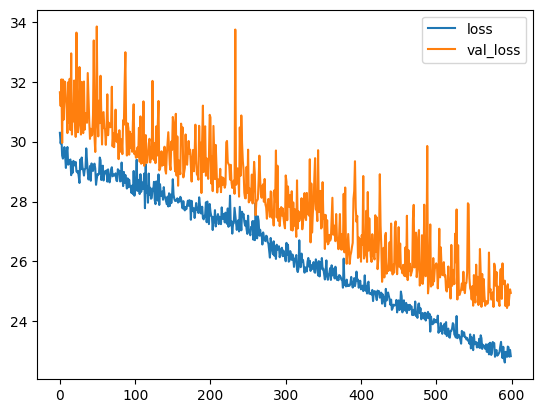

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [30]:
prediction_train = model.predict(X_train)

predictions = model.predict(X_test)



79/79 [==============================] - 0s 2ms/step


In [31]:
print(mean_absolute_error(y_train,predictions_train))

print(np.sqrt(mean_squared_error(y_train,predictions_train)))

print(mean_absolute_error(y_test,predictions))

print(np.sqrt(mean_squared_error(y_test,predictions)))

4.064938013199893
5.3299621832493775
3.549625032878294
4.99509682730386


In [32]:
print(r2_score(y_train,predictions_train))

print(r2_score(y_test,predictions))

0.8829961958453164
0.9013974603004449


#### Adding DropOuts

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=5,activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam')

In [35]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
183/183 [==============================] - 4s 5ms/step - loss: 423.4886 - val_loss: 398.6056
Epoch 2/600
183/183 [==============================] - 1s 4ms/step - loss: 389.1197 - val_loss: 394.4377
Epoch 3/600
183/183 [==============================] - 1s 4ms/step - loss: 382.8175 - val_loss: 390.2182
Epoch 4/600
183/183 [==============================] - 1s 4ms/step - loss: 325.3582 - val_loss: 268.2833
Epoch 5/600
183/183 [==============================] - 1s 4ms/step - loss: 258.5500 - val_loss: 248.5744
Epoch 6/600
183/183 [==============================] - 1s 4ms/step - loss: 243.6570 - val_loss: 232.9130
Epoch 7/600
183/183 [==============================] - 1s 4ms/step - loss: 229.3448 - val_loss: 219.6713
Epoch 8/600
183/183 [==============================] - 1s 4ms/step - loss: 214.7020 - val_loss: 210.8191
Epoch 9/600
183/183 [==============================] - 1s 4ms/step - loss: 205.5878 - val_loss: 197.5184
Epoch 10/600
183/183 [==============================] -

<Axes: >

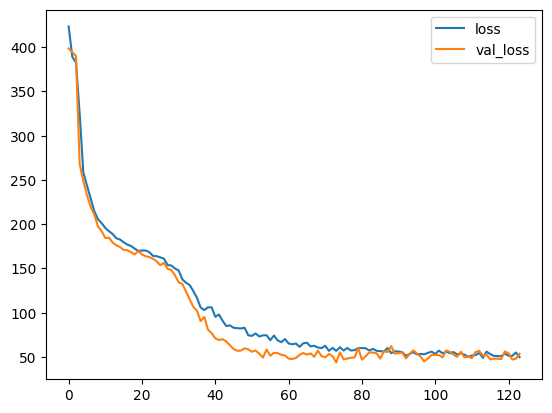

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
predictions_train = model.predict(X_train)

predictions = model.predict(X_test)




79/79 [==============================] - 0s 2ms/step


In [38]:
print(mean_absolute_error(y_train,predictions_train))

print(np.sqrt(mean_squared_error(y_train,predictions_train)))

print(mean_absolute_error(y_test,predictions))

print(np.sqrt(mean_squared_error(y_test,predictions)))

4.659888433933994
6.971873040468908
4.704924585917512
7.317223979790533


In [39]:
print(r2_score(y_train,predictions_train))

print(r2_score(y_test,predictions))

0.799806179972768
0.7884110532721091
